# HW 4

In [3]:
library(quantreg)
library(MASS)
library(graphics)
library(faraway)

ERROR: Error in library(quantreg): there is no package called ‘quantreg’


## Part A (Maximum 5 pages, 60 points). 

Consider the stackloss data, with stack.loss being the response and the other three variables being predictors. Fit models with the following 3 methods respectively:\
1.Ordinary least squares\
2.Least absolute deviations\
3.Huber’s robust regression\
Compare the results. In each case, comment on the significance of predictors. Then use diagnostic methods to detect any outliers or influential points. Remove these points and then use least squares. Compare the results. (60 points)

In [1]:
data(stackloss)
head(stackloss)
dim(stackloss)
summary(stackloss)

,Air.Flow,Water.Temp,Acid.Conc.,stack.loss
,<dbl>,<dbl>,<dbl>,<dbl>
1,80,27,89,42
2,80,27,88,37
3,75,25,90,37
4,62,24,87,28
5,62,22,87,18
6,62,23,87,18


[1] 21  4

    Air.Flow       Water.Temp     Acid.Conc.      stack.loss   
 Min.   :50.00   Min.   :17.0   Min.   :72.00   Min.   : 7.00  
 1st Qu.:56.00   1st Qu.:18.0   1st Qu.:82.00   1st Qu.:11.00  
 Median :58.00   Median :20.0   Median :87.00   Median :15.00  
 Mean   :60.43   Mean   :21.1   Mean   :86.29   Mean   :17.52  
 3rd Qu.:62.00   3rd Qu.:24.0   3rd Qu.:89.00   3rd Qu.:19.00  
 Max.   :80.00   Max.   :27.0   Max.   :93.00   Max.   :42.00  

In [12]:
# Ordinary least squares
OLS = lm(stack.loss~.,data = stackloss)
summary(OLS)


Call:
lm(formula = stack.loss ~ ., data = stackloss)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.2377 -1.7117 -0.4551  2.3614  5.6978 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -39.9197    11.8960  -3.356  0.00375 ** 
Air.Flow      0.7156     0.1349   5.307  5.8e-05 ***
Water.Temp    1.2953     0.3680   3.520  0.00263 ** 
Acid.Conc.   -0.1521     0.1563  -0.973  0.34405    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.243 on 17 degrees of freedom
Multiple R-squared:  0.9136,	Adjusted R-squared:  0.8983 
F-statistic:  59.9 on 3 and 17 DF,  p-value: 3.016e-09


Compared with the other two variables, $Acid.Conc$ is not significant at the 5% significant level.

In [13]:
# Least absolute deviations
LAD = rq(stack.loss~.,data = stackloss)
summary(LAD)


Call: rq(formula = stack.loss ~ ., data = stackloss)

tau: [1] 0.5

Coefficients:
            coefficients lower bd  upper bd 
(Intercept) -39.68986    -41.61973 -29.67754
Air.Flow      0.83188      0.51278   1.14117
Water.Temp    0.57391      0.32182   1.41090
Acid.Conc.   -0.06087     -0.21348  -0.02891

Here are some changes in the coeﬃcients. The coefficient of $Air.Flow$ is now substantially larger while that of $Water.Temp$ is substantially smaller. The confidence intervals now suggest that all the predictors are significant, especially $Acid.Conc$, which is not significant in OLS.

In [14]:
# Huber’s robust regression
HRR = rlm(stack.loss~.,data = stackloss)
summary(HRR)


Call: rlm(formula = stack.loss ~ ., data = stackloss)
Residuals:
     Min       1Q   Median       3Q      Max 
-8.91753 -1.73127  0.06187  1.54306  6.50163 

Coefficients:
            Value    Std. Error t value 
(Intercept) -41.0265   9.8073    -4.1832
Air.Flow      0.8294   0.1112     7.4597
Water.Temp    0.9261   0.3034     3.0524
Acid.Conc.   -0.1278   0.1289    -0.9922

Residual standard error: 2.441 on 17 degrees of freedom

We see that the same two predictors $Air.Flow$ and $Water.Temp$ are significant. The numerical values of coefficients have changed somewhat and the standard errors are generally smaller.

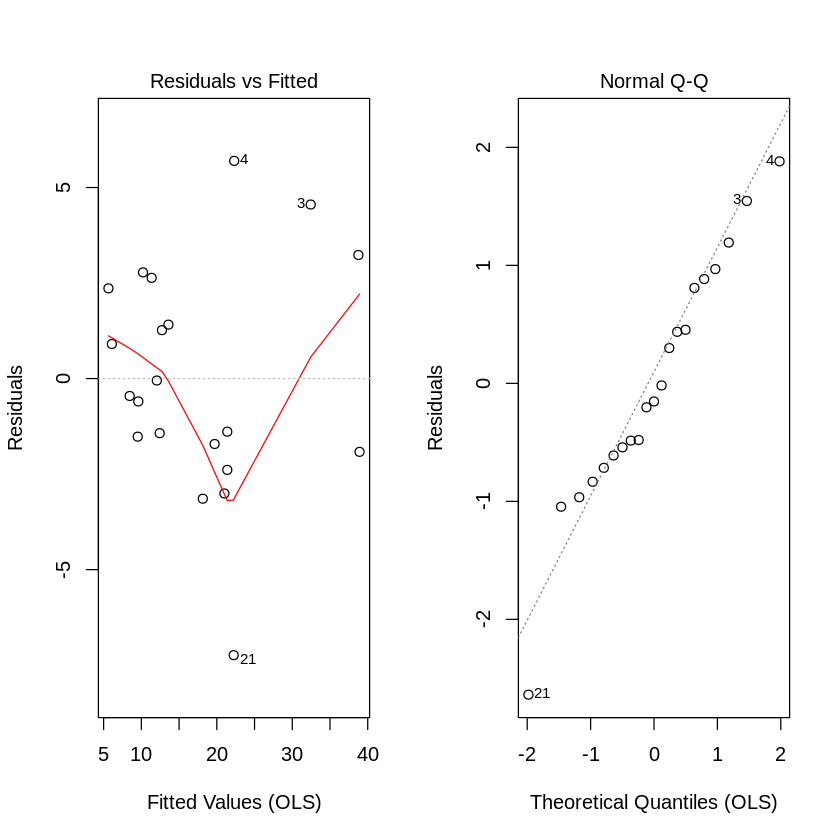

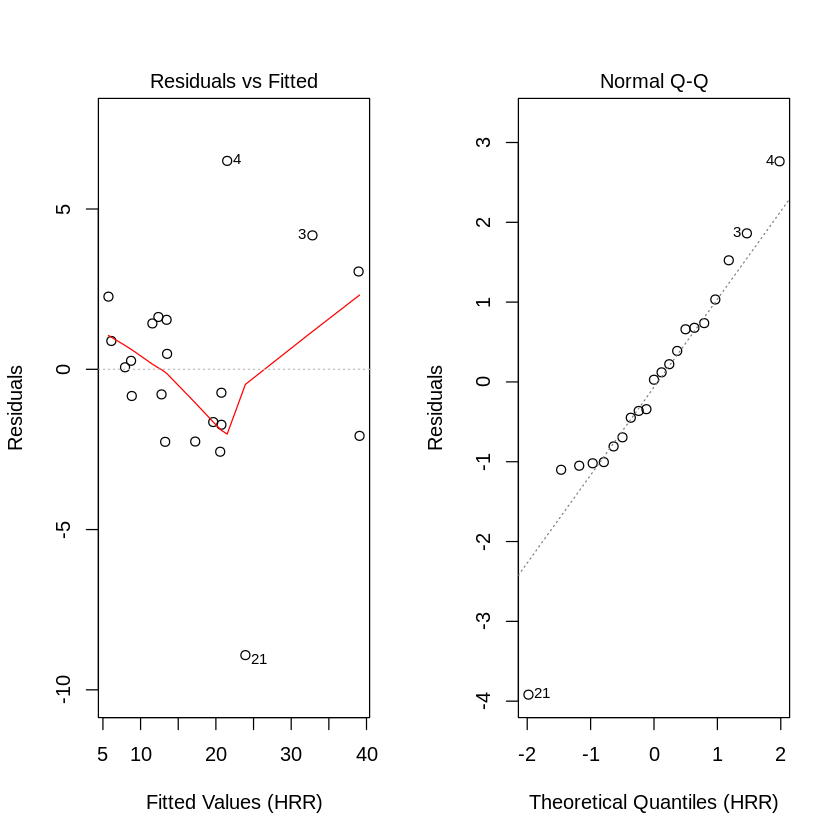

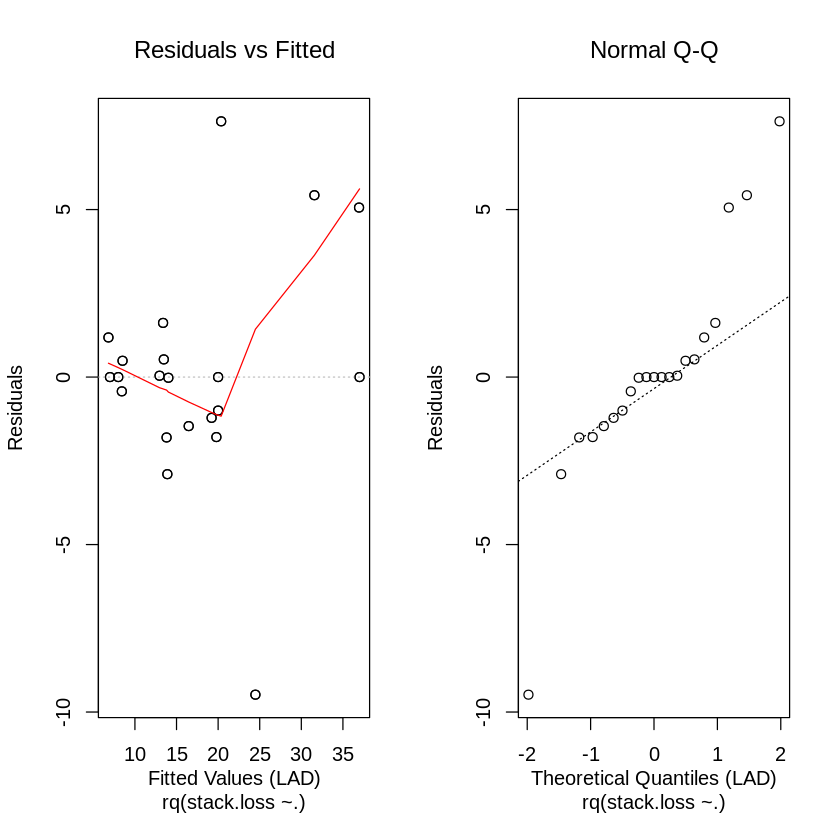

In [26]:
## define plotting functions
plot_residuals <- function(model, model_name){
  par(mfrow=c(1,2))
  ## Residuals vs Fitted
  par(col.lab="white")
  plot(model, which=1)
  par(col.lab="black")
  title(xlab=paste("Fitted Values (", model_name, ")", sep=""), ylab="Residuals")
  ## Q-Q Plot
  par(col.lab="white")
  plot(model, which=2)
  par(col.lab="black")
  title(xlab=paste("Theoretical Quantiles (", model_name, ")", sep=""), ylab="Residuals")
}
plot_residuals_customized <- function(model, model_name, model_func){
  par(mfrow=c(1,2))
  ## Residuals vs Fitted
  plot(fitted(model), residuals(model), xlab=paste("Fitted Values (", model_name, ")\n", model_func, sep=""), ylab="Residuals", main="Residuals vs Fitted", font.main=1)
  abline(h=0, lty=3, col="gray")
  panel.smooth(x=fitted(model), y=residuals(model))
  
  ## Q-Q Plot
  qqnorm(residuals(model), xlab=paste("Theoretical Quantiles (", model_name, ")\n", model_func, sep=""), ylab="Residuals", main="Normal Q-Q", font.main=1)
  qqline(residuals(model), lty=3)
}
## least squares
plot_residuals(OLS, "OLS")
## Huber
plot_residuals(HRR, "HRR")
## LAD
plot_residuals_customized(LAD, "LAD", "rq(stack.loss ~.)")

According to the plots, bothe OLS and HRR are siginificantly influenced by the outlier.

To find the influential points, use cook's distance:

In [21]:
n =dim(stackloss)[1]
p = dim(stackloss)[2]
cook=cooks.distance(OLS)
cook[which(cook>4/(n-p-1))]

21 
0.6919999

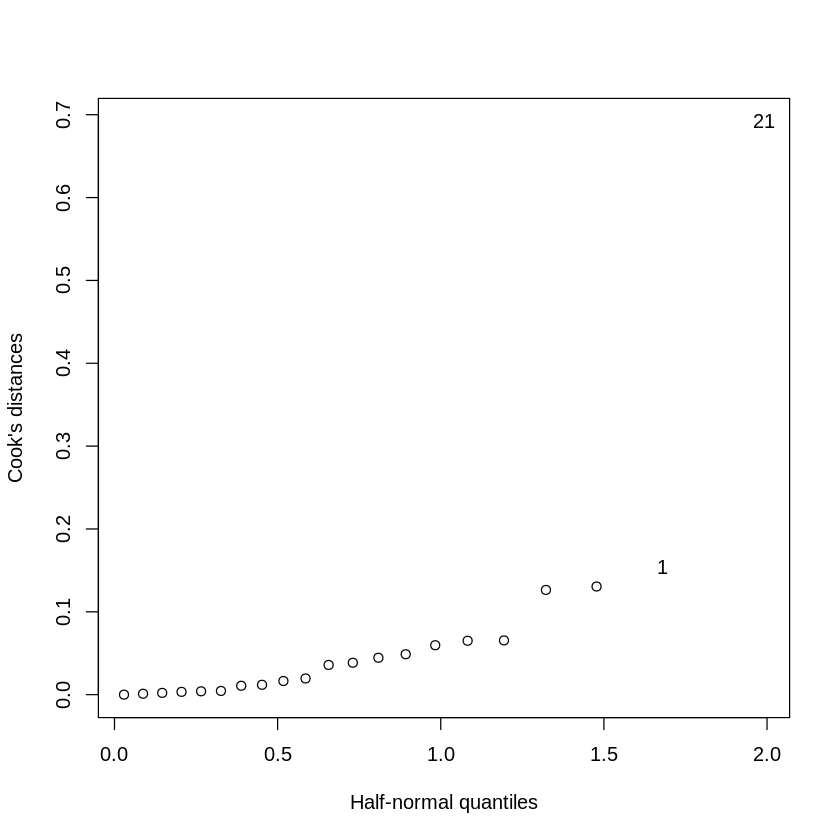

In [37]:
halfnorm(cook, 2, ylab="Cook's distances")

Omit the outlier and fit a new least squares modeL:

In [22]:
OLS_new=lm(stack.loss~.,data = stackloss[-c(21),])
summary(OLS_new)


Call:
lm(formula = stack.loss ~ ., data = stackloss[-c(21), ])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0449 -2.0578  0.1025  1.0709  6.3017 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -43.7040     9.4916  -4.605 0.000293 ***
Air.Flow      0.8891     0.1188   7.481 1.31e-06 ***
Water.Temp    0.8166     0.3250   2.512 0.023088 *  
Acid.Conc.   -0.1071     0.1245  -0.860 0.402338    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.569 on 16 degrees of freedom
Multiple R-squared:  0.9488,	Adjusted R-squared:  0.9392 
F-statistic: 98.82 on 3 and 16 DF,  p-value: 1.541e-10


Compared with the other two variables, $Acid.Conc$ is again not significant at the 5% significant level. The estimate of the other two predictors are similar to the ones in the Huber's model. And the adjusted $R^2$ has improved from 0.8983 to 0.9392.

In [23]:
table = rbind(OLS$coefficients,LAD$coefficients,HRR$coefficients,OLS_new$coefficients)
row.names(table) = c("OLS","LAD","HRR","OLS_new")
table

,(Intercept),Air.Flow,Water.Temp,Acid.Conc.
OLS,-39.91967,0.7156402,1.2952861,-0.15212252
LAD,-39.68986,0.8318841,0.5739130,-0.06086957
HRR,-41.02653,0.8293739,0.9261082,-0.12784916
OLS_new,-43.70403,0.8891082,0.8166199,-0.10714137


The coefficient of $Air.Flow$ is similar in all models, although it is slightly larger in all robust models compared with the OLS. The coefficient of $Water.Temp$ is largest in OLS and smallest in LAD. $Acid.Conc$ decreases in all the models. Overall, the results of Huber's method are the closest to the original least squares model.

## Part B (Maximum 2 pages, 40 points+20 bonus points). 
Still consider the stackloss data.

1. Utilize the Box-Cox model to determine if there should be a transformation on the stack.loss variable in the stackloss data. If there should be one, read the estimate of  $\lambda$ from the plot and fit a model with transformation. (40 points)

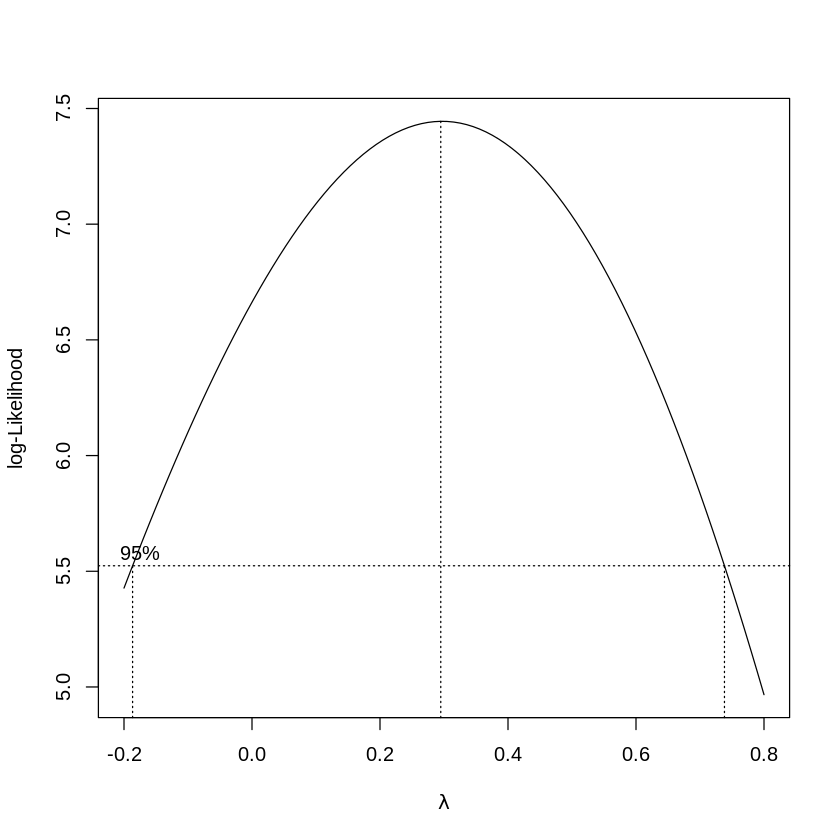

In [30]:
lmod_bc = boxcox(lm(stack.loss~.,data=stackloss), lambda=seq(-.2, .8, by=.05))

In [1]:
BC = lm(stack.loss^(1/3)~. , data=stackloss)
summary(BC)


Call:
lm(formula = stack.loss^(1/3) ~ ., data = stackloss)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27942 -0.08210 -0.02886  0.14067  0.30359 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.4936871  0.5163956  -0.956  0.35246    
Air.Flow     0.0307023  0.0058541   5.245 6.59e-05 ***
Water.Temp   0.0575730  0.0159756   3.604  0.00219 ** 
Acid.Conc.  -0.0006736  0.0067846  -0.099  0.92207    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1408 on 17 degrees of freedom
Multiple R-squared:  0.9189,	Adjusted R-squared:  0.9046 
F-statistic: 64.21 on 3 and 17 DF,  p-value: 1.76e-09


Carried out the Box-Cox transform analysis and generated plot of the likelihood function with the maximum-likelihood estimate and 95% confidence intervals shown on the plot. It looks like a reasonable transformation might be the cube root, so we utilize that power law of $y^{\frac{1}{3}}$ and
re-run least squares regression to get new least-squares estimates with this transformed model. The coeficients are changed fairly dramatically from the original (untransformed) least squares estimates, but that is expected. With this transformed model, the coefficient for the predictor $Acid.Conc$ is again the only predictor with non-significant $p$-value.

2. Carry out some preliminary diagnostics to determine if after utilizing the estimated Box-Cox transform, the least squares regression results appear to satisfactorily satisfy the standard assumptions. Specifically, look at plot of residuals vs. fitted values and QQ plots as a first set of diagnostic analyses. (20 bonus point)

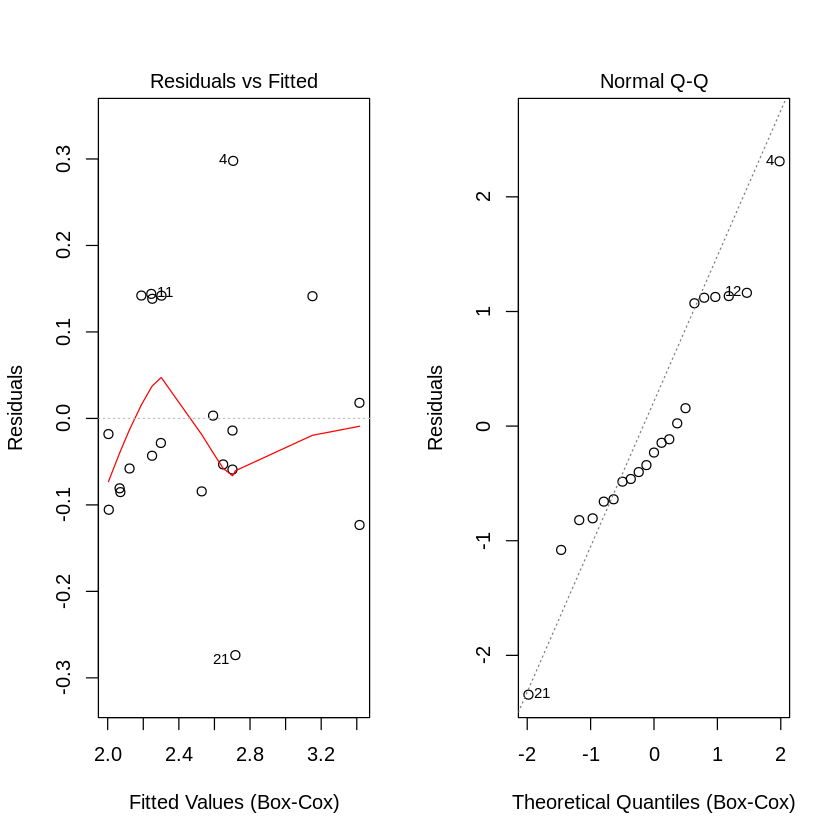

In [34]:
plot_residuals(BC, "Box-Cox")

Carried out residual vs fitted plot and QQ plot on the residuals, and they are above. Both do not look great, but there are not any obvious patterns suggesting there any clear violations on the errors being independent and identically distributed as normal, so  n summary, would say that the diagnostics do not show any obvious significant patterns of concern.